In [ ]:
from sklearn.datasets import make_regression
import numpy as np

In [ ]:
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)

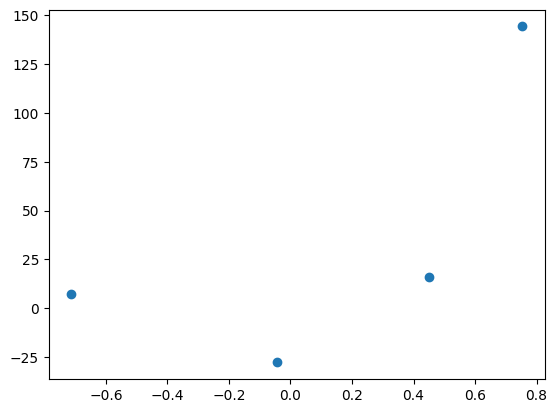

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [ ]:
#lets apply ols
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(X,y)

LinearRegression()

In [ ]:
reg.coef_

array([78.35063668])

In [ ]:
reg.intercept_

np.float64(26.15963284313262)

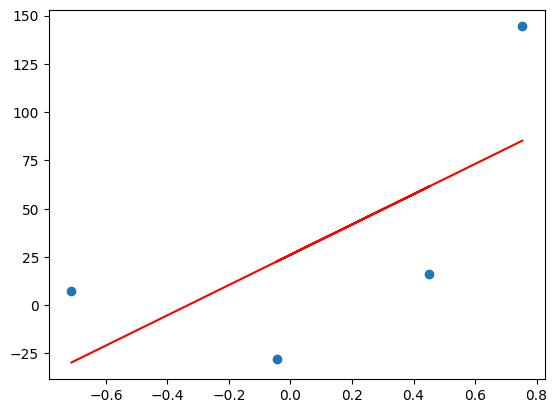

In [ ]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [ ]:
#Lets apply gradient descent assuming slope is constant m = 78.35
# and lets assume the starting value for intercept b = 0
y_pred = ((78.35 * X)+ 0).reshape(4)

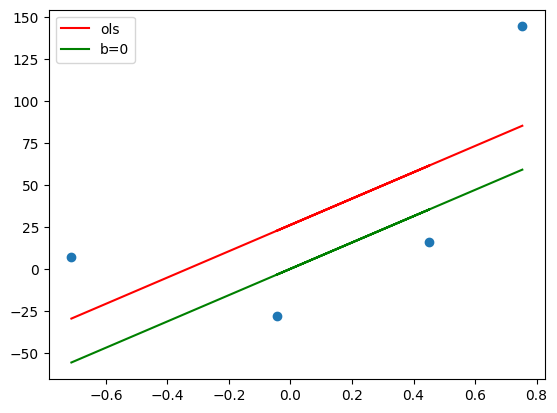

In [ ]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red', label='ols')
plt.plot(X,y_pred,color='green', label='b=0')
plt.legend()
plt.show()

In [ ]:
m = 73.58
b = 0

loss_slope = -2 * np.sum(y - m * X.ravel() - b)
loss_slope

np.float64(-213.5580887628329)

In [ ]:
#lets take learning rate is 0.1
lr = 0.1

step_size = loss_slope * lr
step_size

np.float64(-21.35580887628329)

In [ ]:
# calculating the new interxcept
new_b = b - step_size
new_b

np.float64(21.35580887628329)

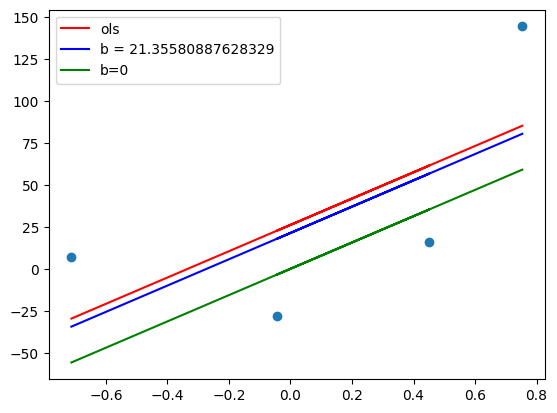

In [ ]:
y_pred1 = ((78.35 * X)+ new_b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red', label='ols')
plt.plot(X,y_pred1,color='blue', label='b = {}'.format(new_b))
plt.plot(X,y_pred,color='green', label='b=0')
plt.legend()
plt.show()

In [ ]:
# 2nd iteration

loss_slope = -2 * np.sum(y - m * X.ravel() - new_b)
loss_slope

np.float64(-42.71161775256658)

In [ ]:
step_size = loss_slope * lr
step_size

np.float64(-4.271161775256658)

In [ ]:
# calculating the new intercept
new_b = new_b - step_size
new_b

np.float64(25.62697065153995)

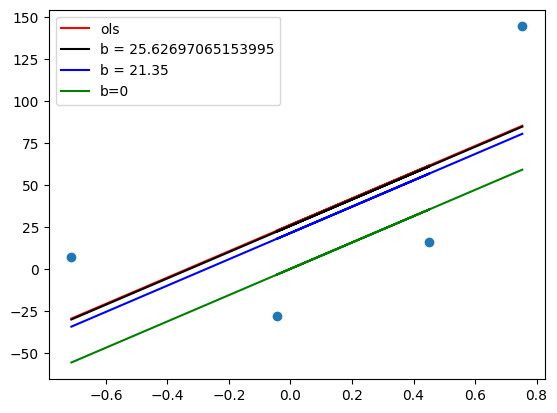

In [ ]:
y_pred2 = ((78.35 * X)+ new_b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red', label='ols')
plt.plot(X,y_pred2,color='black', label='b = {}'.format(new_b))
plt.plot(X,y_pred1,color='blue', label='b = 21.35')
plt.plot(X,y_pred,color='green', label='b=0')
plt.legend()
plt.show()

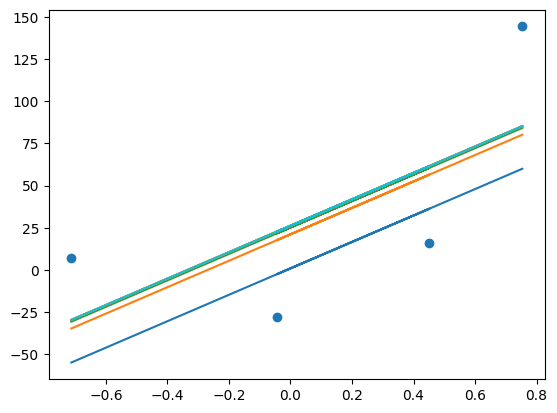

In [ ]:
b = -100
m = 78.35
lr = 0.1

epochs = 10

for i in range(epochs):
    loss_slope = -2 * np.sum(y - m * X.ravel() - b)
    b = b - (lr * loss_slope)

    y_pred = m * X + b

    plt.plot(X,y_pred)

plt.scatter(X,y)

# Create GD Class

In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

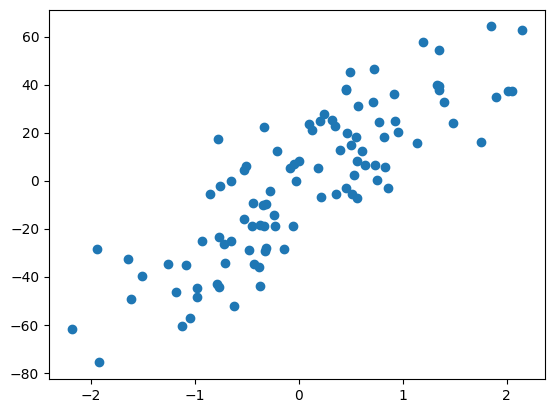

In [ ]:
plt.scatter(X,y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [ ]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661012

In [ ]:
m = 27.82

In [ ]:
class GDRegressor:

    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())

            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)

    def predict(self,X):
        return self.m * X + self.b

In [ ]:
gd = GDRegressor(0.001,50)

In [ ]:
gd.fit(X_train,y_train)

28.159367347119066 -2.3004574196824854


In [ ]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6343842836315579